# Question 1 - [45 Points] Link Analysis

In [1]:
import pandas as pd
import numpy as np
# global adjacency_matrix,adjacency_list

In [2]:
""" number of nodes = 3,783, 
    number of edges in the graph 24,186,
    graph is undirected, thus indegree = outdegree =0 
    """
df = pd.read_csv('soc-sign-bitcoinalpha.csv',header=None)
df = df[[0,1]]
df
nodes =set()

for i in df[0]:
    nodes.add(i)

for i in df[1]:
    nodes.add(i)
nodes

final_nodes = list(nodes)
final_nodes

df[0]=df[0].apply(lambda row: final_nodes.index(row))
df[1]=df[1].apply(lambda row: final_nodes.index(row))
df
# len(np.unique(df[1]))

,0,1
0,3497,0
1,429,0
2,3133,0
3,3025,0
4,3009,0
...,...,...
24181,3782,3779
24182,3779,3782
24183,3782,3780
24184,3780,3782


In [3]:
"""create adjacency matrix"""
adjacency_matrix = [[0 for i in range(3783)] for j in range(3783)]
"""create adjacency list"""
adjacency_list = [[] for i in range(3783)]

## create adjacency list and matrix for the graph

In [8]:
count =0 
in_deg = [0 for i in range(3783)]
out_deg = [0 for i  in range(3783)]

for i in df.iterrows():
    u = i[1][0]
    v = i[1][1]
    # print(u,v)
    # break
    adjacency_matrix[u][v]=1
    in_deg[v]+=1
    out_deg[u]+=1
    # adjacency_matrix[v][u]=1
    
    adjacency_list[u].append(v)
    # adjacency_list[v].append(u)

    

In [9]:
df_adMat = pd.DataFrame(adjacency_matrix)
df_adMat


,0,1,2,3,4,5,6,7,8,9,...,3773,3774,3775,3776,3777,3778,3779,3780,3781,3782
0,0,1,0,1,0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,1,0
1,1,0,1,1,1,0,1,1,1,1,...,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,1,1,1,1,0,1,...,1,0,0,0,0,0,0,0,0,1
3,1,1,0,0,0,0,0,0,1,1,...,0,1,0,0,0,0,0,0,0,0
4,0,1,1,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3778,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3779,0,0,0,0,0,0,1,0,0,0,...,0,0,0,1,1,1,0,0,0,1
3780,0,0,0,0,0,0,1,0,0,0,...,0,0,0,1,1,1,1,0,0,1
3781,1,1,0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [20]:
adjacency_list
df = pd.DataFrame(list(zip(adjacency_list)),columns=['List'])

df

,List
0,"[159, 1027, 308, 10, 593, 1315, 1391, 1582, 88..."
1,"[0, 36, 37, 167, 3, 19, 766, 22, 39, 90, 112, ..."
2,"[4, 91, 5, 206, 122, 286, 102, 33, 55, 141, 11..."
3,"[0, 1, 301, 3730, 167, 76, 422, 380, 62, 149, ..."
4,"[1, 2, 66, 18, 7, 45, 12, 247, 5, 30, 52, 31, ..."
...,...
3778,"[6, 82, 116, 156, 160, 189, 213, 1152, 2217]"
3779,"[6, 52, 94, 176, 187, 1690, 3512, 3776, 3777, ..."
3780,"[6, 25, 52, 94, 176, 187, 1690, 3512, 3776, 37..."
3781,"[0, 1, 3, 8, 10, 13, 16, 17, 19, 20, 21, 23, 2..."


### Node with maximum in and out degree

In [23]:
# in_deg
# out_deg
max_inDeg = max(in_deg)
inNode = in_deg.index(max_inDeg)
max_outDeg =max(out_deg)
outNode = out_deg.index(max_outDeg)
print("Maximum In degree Node {} with degree {}\t".format(inNode,max_inDeg))
print("Maximum Out degree Node {} with degree {}\t".format(outNode,max_outDeg))


Maximum In degree Node 0 with degree 398	
Maximum Out degree Node 0 with degree 490	


### average degree and node with maximum degree

In [24]:
node =-1
avg_inDeg = sum(in_deg)/len(in_deg)
avg_outDeg = sum(out_deg)/len(out_deg)

print("Average In-Degree--->",avg_inDeg)
print("Average Outn-Degree--->",avg_outDeg)


Average In-Degree---> 6.393338620142744
Average Outn-Degree---> 6.393338620142744


In [25]:
unique_indegrees = set(in_deg)
unique_outdegrees = set(out_deg)

    

### density of the graph

In [26]:
""" density of graph (undirected) = 2*|E|/(|V|* (|V|-1))"""
density = 2*8823/(3783*3782) 
density

0.0012333558812539552

## Degree distribution plot

#### in degree

In [27]:
""" Calculate the indegree frequency for every unique indegree in the network. """
nodes_indegree ={}
for i in unique_indegrees:
    nodes_indegree[i] = in_deg.count(i)/len(in_deg)
# nodes_indegree


#### Out degree

In [28]:
""" Calculate the outdegree frequency for every unique outdegree in the network. """
nodes_outdegree ={}
for i in unique_outdegrees:
    nodes_outdegree[i] = out_deg.count(i)/len(out_deg)
# nodes_outdegree

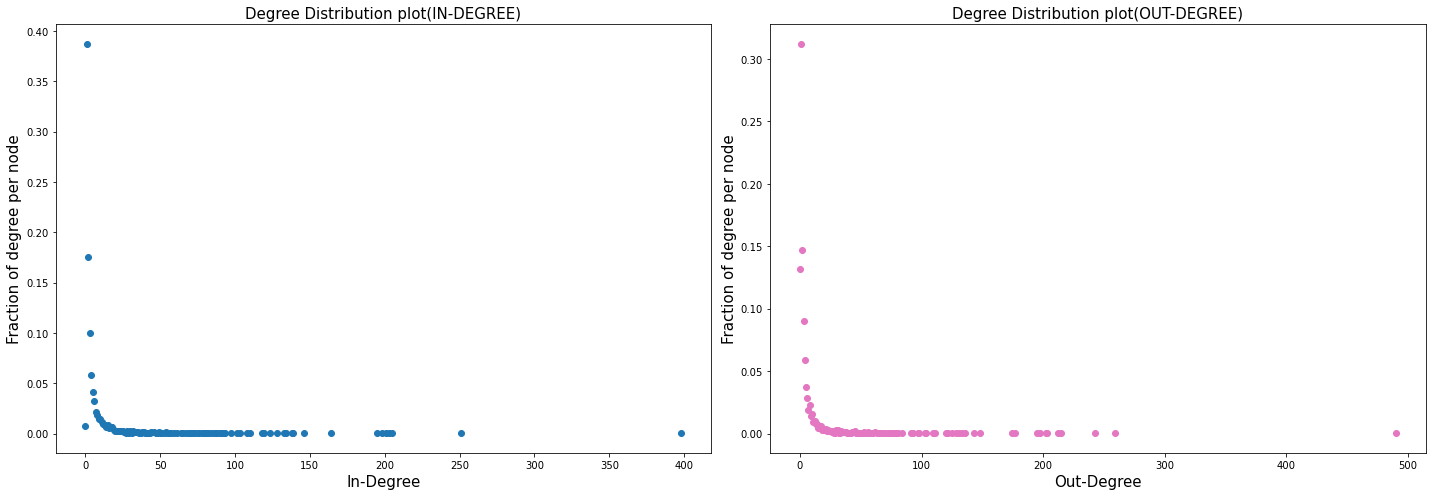

In [29]:
import matplotlib.pyplot as plt
fig= plt.figure(figsize=(20,7))
plt.subplot(1, 2,1,)

plt.scatter(nodes_indegree.keys(),nodes_indegree.values())

plt.title("Degree Distribution plot(IN-DEGREE)",fontsize=15)
plt.xlabel('In-Degree',fontsize=15)
plt.ylabel("Fraction of degree per node",fontsize=15)
plt.subplot(1, 2, 2)

plt.scatter(nodes_outdegree.keys(),nodes_outdegree.values(),color = "tab:pink")

plt.title("Degree Distribution plot(OUT-DEGREE)",fontsize=15)
plt.xlabel('Out-Degree',fontsize=15)
plt.ylabel("Fraction of degree per node",fontsize=15)
fig.tight_layout()
# plt.grid()

## local clustering coefficient

In [141]:
""" for node v, cc = 2*Nv/(Kv(Kv-1))
where Nv is the link between neighbouring nodes and Kv is the degree of node v"""

out_degree_coeff={} 
"""out_degre_coeff = {DEGREE: CLUSTERING COEFFICIENT LIST FOR THAT DEGREE}"""


clusteringCoef ={}
"""clusteringCoef = {NODE: CLUSTERING COEFFICIENT FOR THAT NODE}"""


"""Iterate over all the nodes, for each node see the number of neighbours of that node. 
    for each node pair in the neighbouring nodes, if there is a link between the two, increase the count of Nv. """
for i in range(3783):
    Nv=0
    linked_nodes = adjacency_list[i]
    if len(linked_nodes) >1:
        for n1 in linked_nodes:
            for n2 in linked_nodes:
                if(adjacency_matrix[n1][n2]==1):
                    Nv+=1
        Nv /=2
        # clusteringCoef[i] = 2*Nv/(len(linked_nodes)*(len(linked_nodes)-1))
        """ to calculate the clustering Coefficient, find out using the out-degree in the formula above."""
        clusteringCoef[i] = 2*Nv/(out_deg[i]*(out_deg[i]-1))

        """Simultaneously, make a dictionary that contains all the clustering coefficient corresponding to a particular out degree """
        if out_deg[i] not in out_degree_coeff:
            out_degree_coeff[out_deg[i]] =[]
        else:
            out_degree_coeff[out_deg[i]].append(clusteringCoef[i])

    else:
        if out_deg[i] not in out_degree_coeff:
            out_degree_coeff[out_deg[i]] =[]
        else:
            out_degree_coeff[out_deg[i]].append(0)
        clusteringCoef[i]=0
clusteringCoef



{0: 0.004732690622261174,
 1: 0.053423209093312184,
 2: 0.03156140529877904,
 3: 0.02538578569876114,
 4: 0.045412264965783,
 5: 0.05111233682662254,
 6: 0.035790932665653225,
 7: 0.021879021879021878,
 8: 0.05589480941593618,
 9: 0.046000256805341554,
 10: 0.06406379554211579,
 11: 0.06077755905511811,
 12: 0.019161290322580644,
 13: 0.04850397381954184,
 14: 0.0382782554646224,
 15: 0.028361344537815126,
 16: 0.08542178542178543,
 17: 0.030636030636030636,
 18: 0.11583856843708357,
 19: 0.14661654135338345,
 20: 0.08986568986568987,
 21: 0.06848685420113991,
 22: 0.040983606557377046,
 23: 0.11491784914115011,
 24: 0.07492354740061162,
 25: 0.07894736842105263,
 26: 0.1287762416794675,
 27: 0.02959830866807611,
 28: 0.12097902097902098,
 29: 0.07206451612903225,
 30: 0.16182873730043543,
 31: 0.1327286190299889,
 32: 0.04945533769063181,
 33: 0.12691511387163562,
 34: 0.21652421652421652,
 35: 0.12723141837065888,
 36: 0.1090146750524109,
 37: 0.06091772151898734,
 38: 0.111030478955

In [112]:
cluster_count = {}
unique_cluster = set(clusteringCoef.values())
for i in unique_cluster:
    cluster_count[i] = list(clusteringCoef.values()).count(i)/len(unique_cluster)
# x= cluster_count.keys()


### calculate the degree wise clustering coeff

In [132]:
fin = {}
"""For every degree  in the network, find the average clustering coefficient of the degree and store them in the dictionary"""
for k,v in  out_degree_coeff.items():
    if(len(v)>0):
        fin[k] = sum(v)/len(v)
fin

{148: 0.06848685420113991,
 125: 0.07206451612903225,
 93: 0.011220196353436185,
 57: 0.18107769423558898,
 62: 0.08716728362418473,
 44: 0.08128964059196618,
 66: 0.10862470862470862,
 53: 0.08722786647314948,
 74: 0.04405775638652351,
 27: 0.099002849002849,
 54: 0.12473794549266247,
 80: 0.07120253164556962,
 0: 0.0,
 50: 0.0653061224489796,
 45: 0.08695286195286195,
 38: 0.1721194879089616,
 41: 0.13658536585365855,
 34: 0.08006535947712418,
 31: 0.14229390681003584,
 22: 0.14393939393939395,
 43: 0.14465669988925803,
 40: 0.15096153846153848,
 37: 0.18093093093093093,
 56: 0.11201298701298701,
 69: 0.030051150895140665,
 21: 0.11904761904761907,
 17: 0.1915266106442577,
 47: 0.09320074005550416,
 39: 0.07692307692307693,
 42: 0.18466898954703834,
 46: 0.1142512077294686,
 24: 0.1337991718426501,
 51: 0.1619607843137255,
 33: 0.09517045454545456,
 16: 0.14507575757575755,
 26: 0.1196923076923077,
 48: 0.11702127659574468,
 20: 0.16578947368421054,
 35: 0.15819327731092436,
 36: 0.0

Text(0, 0.5, 'CC(k)')

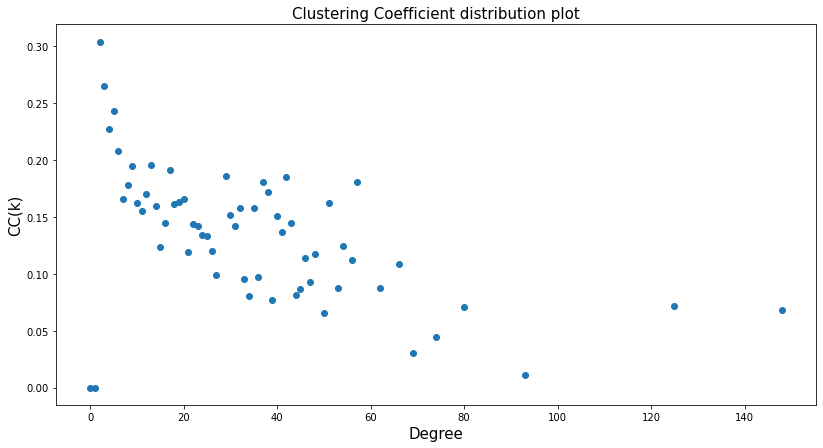

In [144]:
import matplotlib.pyplot as plt
fig= plt.figure(figsize=(30,7))
plt.subplot(1, 2,1)
ax = plt.gca()

# plt.scatter(np.arange(0,3783),norm_coeff)

ax.scatter(fin.keys(),fin.values())
# ax.set_yscale('log')
# ax.set_xscale('log')

ax.set_title("Clustering Coefficient distribution plot",fontsize=15)
ax.set_xlabel('Degree',fontsize=15)
# plt.ylabel("Frequency",fontsize=15)
ax.set_ylabel("CC(k)",fontsize=15)

# plt.subplot(1, 2, 2)


Text(0, 0.5, 'Frequency')

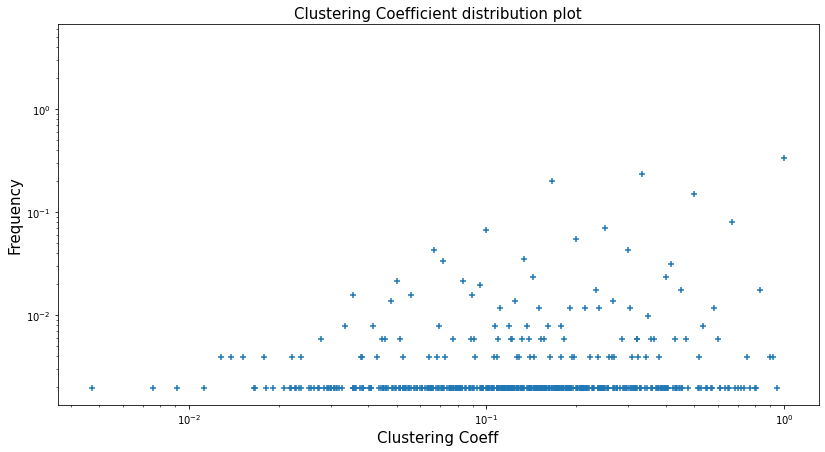

In [145]:
import matplotlib.pyplot as plt
fig= plt.figure(figsize=(30,7))
plt.subplot(1, 2,1)
ax = plt.gca()

# plt.scatter(np.arange(0,3783),norm_coeff)

ax.scatter(cluster_count.keys(),cluster_count.values(),marker='+')
ax.set_yscale('log')
ax.set_xscale('log')

ax.set_title("Clustering Coefficient distribution plot",fontsize=15)
ax.set_xlabel('Clustering Coeff',fontsize=15)
# plt.ylabel("Frequency",fontsize=15)
ax.set_ylabel("Frequency",fontsize=15)

# plt.subplot(1, 2, 2)
